## Importing the Modules

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

## Loading the 3 datasets

In [91]:
email_table_df = pd.read_csv("C:/Users/S G Sumanth/Downloads/email_table.csv")
email_opened_df = pd.read_csv("C:/Users/S G Sumanth/Downloads/email_opened_table.csv")
email_link_df = pd.read_csv("C:/Users/S G Sumanth/Downloads/link_clicked_table.csv")

In [92]:
# Merge the email df with opened and link clicked df since we need to know who opened or clicked
# By merging we are creating a column for 'opened' and 'clicked' to analyze the click behaviour by feature engineering
email_table_df['opened'] = email_table_df['email_id'].isin(email_opened_df['email_id']).astype(int)
email_table_df['clicked'] = email_table_df['email_id'].isin(email_link_df['email_id']).astype(int)

In [93]:
email_table_df

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,opened,clicked
0,85120,short_email,personalized,2,Sunday,US,5,0,0
1,966622,long_email,personalized,12,Sunday,UK,2,1,1
2,777221,long_email,personalized,11,Wednesday,US,2,0,0
3,493711,short_email,generic,6,Monday,UK,1,0,0
4,106887,long_email,generic,14,Monday,US,6,0,0
...,...,...,...,...,...,...,...,...,...
99995,803504,short_email,personalized,4,Monday,US,5,0,0
99996,899722,long_email,personalized,7,Saturday,US,1,0,0
99997,449610,long_email,personalized,11,Saturday,UK,6,0,0
99998,72497,short_email,generic,10,Monday,UK,0,0,0


In [94]:
email_table_df.columns

Index(['email_id', 'email_text', 'email_version', 'hour', 'weekday',
       'user_country', 'user_past_purchases', 'opened', 'clicked'],
      dtype='object')

## Perform Exploratory Data Analysis on the Dataset

In [95]:
# Understand the Statistics of the Updated Email Table

In [96]:
# Total emails sent -> Random sample of users have been emailed
len(email_table_df)

100000

In [97]:
# Check the email open and link click rate and understand
open_rate = email_table_df['opened'].mean()*100
click_rate = email_table_df['clicked'].mean()*100
print(f"Email Open Rate: {open_rate:.2f}%")
print(f"Link Click Rate: {click_rate:.2f}%")

Email Open Rate: 10.35%
Link Click Rate: 2.12%


In [98]:
# Group Analysis
email_table_df.groupby('email_text')[['opened','clicked']].mean()*100

,opened,clicked
email_text,,
long_email,9.117670,1.853767
short_email,11.585954,2.387177


In [99]:
email_table_df.groupby('email_version')[['opened','clicked']].mean()*100

,opened,clicked
email_version,,
generic,7.934832,1.513673
personalized,12.775401,2.729409


In [100]:
email_table_df.groupby('hour')[['opened','clicked']].mean()*100

,opened,clicked
hour,,
1,8.842027,1.812801
2,8.786725,1.632209
3,8.459870,1.952278
4,8.822483,1.618641
5,8.212487,1.801252
6,9.028801,1.714668
7,9.007801,1.828376
8,8.847345,1.893308
9,12.568883,2.579435


In [101]:
email_table_df.groupby('weekday')[['opened','clicked']].mean()*100

,opened,clicked
weekday,,
Friday,7.413416,1.403682
Monday,11.606210,2.290608
Saturday,8.765186,1.784611
Sunday,8.764857,1.675123
Thursday,11.844225,2.444491
Tuesday,12.048363,2.488864
Wednesday,12.027833,2.761999


In [102]:
top_countries = email_table_df['user_country'].value_counts().head(10)

In [103]:
top_countries

user_country
US    60099
UK    19939
FR     9995
ES     9967
Name: count, dtype: int64

In [104]:
top_countries = top_countries.index

In [105]:
top_countries

Index(['US', 'UK', 'FR', 'ES'], dtype='object', name='user_country')

In [106]:
email_table_df[email_table_df['user_country'].isin(top_countries)].groupby('user_country')[['opened','clicked']].mean()*100

,opened,clicked
user_country,,
ES,3.912913,0.832748
FR,4.062031,0.800400
UK,12.016651,2.467526
US,11.902028,2.435981


In [107]:
# Create bins for user_past_purchases
bins = [0, 1, 5, 10, 20, email_table_df['user_past_purchases'].max()]
labels = ['0', '1-5', '6-10', '11-20', '21 and above']
email_table_df['purchase_bin'] = pd.cut(email_table_df['user_past_purchases'], bins=bins, labels=labels, right=False)

# Group by bins
email_table_df.groupby('purchase_bin')[['opened', 'clicked']].mean() * 100

C:\Users\S G Sumanth\AppData\Local\Temp\ipykernel_8764\712694345.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  email_table_df.groupby('purchase_bin')[['opened', 'clicked']].mean() * 100


,opened,clicked
purchase_bin,,
0,3.833682,0.050443
1-5,10.272744,1.580422
6-10,12.478548,3.141914
11-20,14.983871,6.016129
21 and above,40.000000,13.333333


## Visualizations

In [108]:
# Plotting

In [109]:
email_text = email_table_df.groupby('email_text')['clicked'].mean().reset_index()

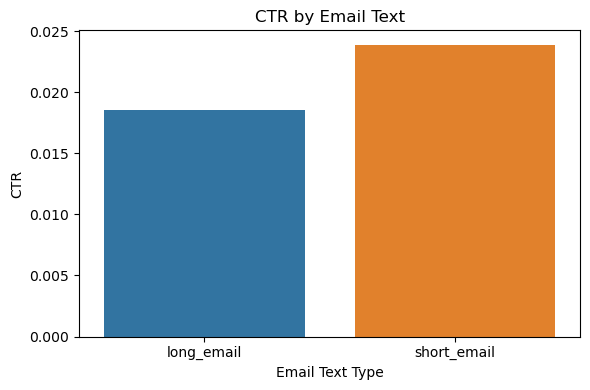

In [110]:
plt.figure(figsize=(6, 4))
sns.barplot(data=email_text, x='email_text', y='clicked')
plt.title('CTR by Email Text')
plt.ylabel('CTR')
plt.xlabel('Email Text Type')
plt.tight_layout()
plt.show()

In [111]:
email_version = email_table_df.groupby('email_version')['clicked'].mean().reset_index()

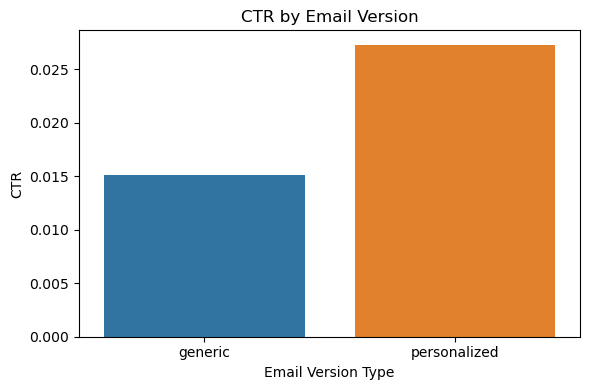

In [112]:
plt.figure(figsize=(6, 4))
sns.barplot(data=email_version, x='email_version', y='clicked')
plt.title('CTR by Email Version')
plt.ylabel('CTR')
plt.xlabel('Email Version Type')
plt.tight_layout()
plt.show()

In [113]:
email_hour = email_table_df.groupby('hour')['clicked'].mean().reset_index()

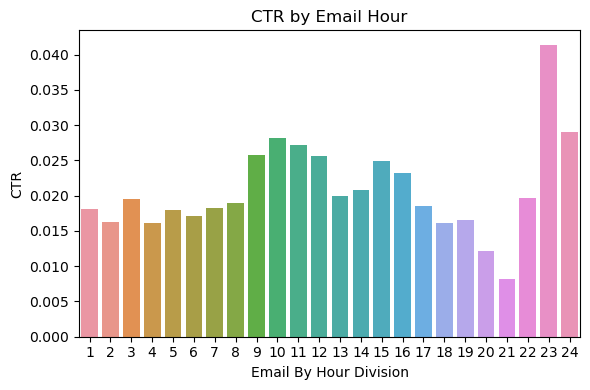

In [114]:
plt.figure(figsize=(6, 4))
sns.barplot(data=email_hour, x='hour', y='clicked')
plt.title('CTR by Email Hour')
plt.ylabel('CTR')
plt.xlabel('Email By Hour Division')
plt.tight_layout()
plt.show()

In [115]:
email_weekday = email_table_df.groupby('weekday')['clicked'].mean().reset_index()

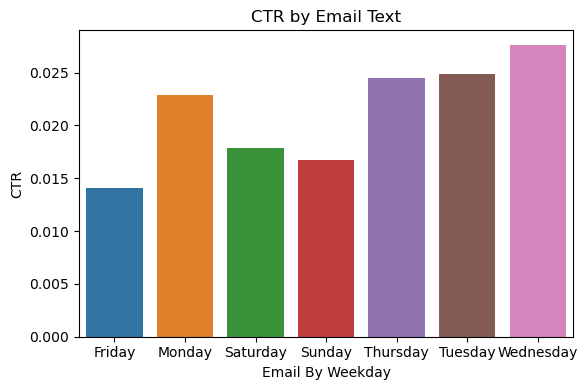

In [116]:
plt.figure(figsize=(6, 4))
sns.barplot(data=email_weekday, x='weekday', y='clicked')
plt.title('CTR by Email Text')
plt.ylabel('CTR')
plt.xlabel('Email By Weekday')
plt.tight_layout()
plt.show()

## Predictive Modeling Technique for CTR Optimization

In [117]:
# Understand the features which directly contribute to maximizing the probability of users clicking the link

In [118]:
# Preprocessing of the features

In [119]:
features = ['email_text', 'email_version', 'hour', 'weekday','user_country', 'user_past_purchases']
X = pd.get_dummies(email_table_df[features])
y = email_table_df['clicked']

In [122]:
scaler = StandardScaler()
X[['hour','user_past_purchases']] = scaler.fit_transform(X[['hour','user_past_purchases']])

In [123]:
# Train and test Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [131]:
# Simple Logistic Regression
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [132]:
# Predict
y_pred = model1.predict(X_test)
y_proba = model1.predict_proba(X_test)[:, 1]

# Evaluation
print("Simple Logistic Regression Result:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Simple Logistic Regression Result:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19576
           1       0.00      0.00      0.00       424

    accuracy                           0.98     20000
   macro avg       0.49      0.50      0.49     20000
weighted avg       0.96      0.98      0.97     20000

ROC AUC Score: 0.7351875081925499


C:\Users\S G Sumanth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\S G Sumanth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\S G Sumanth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [133]:
# Decision Tree
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [134]:
# Predictions
y_pred = model2.predict(X_test)
y_proba = model2.predict_proba(X_test)[:, 1]

# Evaluation
print("Decision Tree Result:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Decision Tree Result:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     19576
           1       0.09      0.02      0.04       424

    accuracy                           0.97     20000
   macro avg       0.53      0.51      0.51     20000
weighted avg       0.96      0.97      0.97     20000

ROC AUC Score: 0.5363465492015638


In [136]:
# Random Forest
model3 = RandomForestClassifier(random_state = 42)
model3.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [137]:
# Predict
y_pred = model3.predict(X_test)
y_proba = model3.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest Result:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Random Forest Result:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19576
           1       0.07      0.01      0.02       424

    accuracy                           0.98     20000
   macro avg       0.52      0.50      0.50     20000
weighted avg       0.96      0.98      0.97     20000

ROC AUC Score: 0.5771433999853498


## Optimizing the Click Through Rate using simulated model-based approach

In [141]:
# Predict probabilities for all users
email_table_df['click_proba'] = model.predict_proba(X)[:, 1]

In [146]:
# Simulate targeting top 40% most likely to click
top_n_percent = 0.4
top_users = email_table_df.sort_values('click_proba', ascending=False).head(int(top_n_percent * len(email_table_df)))
model_ctr = (top_users['clicked'].sum() / len(top_users)) * 100

In [147]:
model_ctr

4.697500000000001

In [148]:
# Follow up has been described in the word document available in Github